In [17]:
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt
import math 

In [1]:
batch_size = 128
num_classes = 10 
epochs = 100

In [2]:
def show_sample(images,labels,sample_count=25) :
  grid_count = math.ceil(math.ceil(math.sqrt(sample_count)))
  grid_count = min(grid_count,len(images),len(labels))

  plt.figure(figsize=(2*grid_count,2*grid_count))
  for i in range(sample_count) :
    plt.subplot(grid_count,grid_count,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i],cmap=plt.cm.gray)
    plt.xlabel(labels[i])
  plt.show()

In [5]:
mnist = keras.datasets.mnist

In [6]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
train_images = train_images / 255
test_images = test_images / 255 

In [9]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
keras.layers.Reshape(target_shape=(28,28,1)),
keras.layers.Conv2D(filters=32, kernel_size=(3,3),activation=tf.nn.relu),
keras.layers.Conv2D(filters=64, kernel_size=(3,3),activation=tf.nn.relu),
keras.layers.MaxPooling2D(pool_size=(2,2)),
keras.layers.Dropout(0.25),
keras.layers.Flatten(input_shape=(28,28)),
keras.layers.Dense(128,activation=tf.nn.relu),
keras.layers.Dropout(0.5),
keras.layers.Dense(10)])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)             

In [10]:
modelCheckPoint = tf.keras.callbacks.ModelCheckpoint('digit_model.h5',save_best_only=True)
monitor_acc = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5)

In [11]:
history = model.fit(train_images, train_labels, validation_data=(test_images,test_labels),epochs=epochs,batch_size=batch_size,callbacks=[modelCheckPoint,monitor_acc])

Epoch 1/100
469/469 [==============================] - 7s 15ms/step - loss: 0.2321 - accuracy: 0.9297 - val_loss: 0.0526 - val_accuracy: 0.9834
Epoch 2/100
469/469 [==============================] - 7s 14ms/step - loss: 0.0850 - accuracy: 0.9748 - val_loss: 0.0364 - val_accuracy: 0.9884
Epoch 3/100
469/469 [==============================] - 6s 14ms/step - loss: 0.0607 - accuracy: 0.9817 - val_loss: 0.0301 - val_accuracy: 0.9903
Epoch 4/100
469/469 [==============================] - 6s 14ms/step - loss: 0.0498 - accuracy: 0.9851 - val_loss: 0.0303 - val_accuracy: 0.9900
Epoch 5/100
469/469 [==============================] - 7s 14ms/step - loss: 0.0421 - accuracy: 0.9869 - val_loss: 0.0300 - val_accuracy: 0.9909
Epoch 6/100
469/469 [==============================] - 7s 14ms/step - loss: 0.0344 - accuracy: 0.9891 - val_loss: 0.0269 - val_accuracy: 0.9914
Epoch 7/100
469/469 [==============================] - 7s 14ms/step - loss: 0.0319 - accuracy: 0.9898 - val_loss: 0.0300 - val_accuracy:

In [12]:
test_loss, test_acc = model.evaluate(test_images,test_labels)

print('test_accuracy:',test_acc) 

313/313 [==============================] - 1s 4ms/step - loss: 0.0331 - accuracy: 0.9919
test_accuracy: 0.9919000267982483


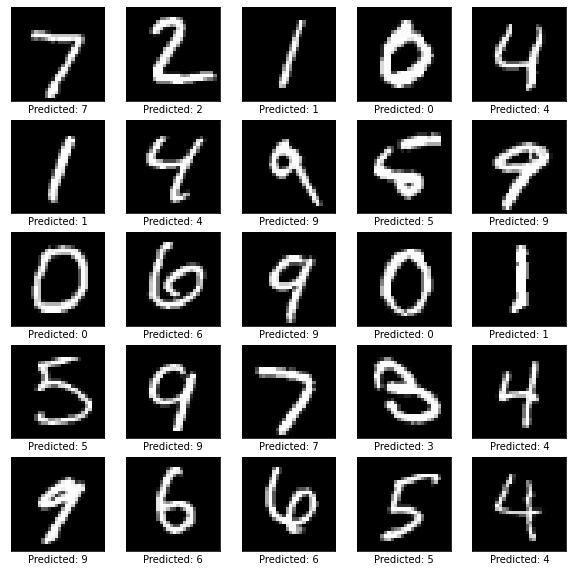

In [13]:
predictions = model.predict(test_images)
show_sample(test_images,['Predicted: %d' % np.argmax(result) for result in predictions])

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import cv2 

In [77]:
frame = 'drive/My Drive/CV_practice/mnist_classify/digit_img.jpg'

width:4032
height:3024
channel:3


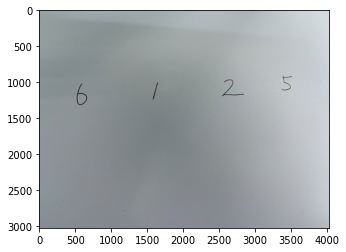

In [78]:
img = cv2.imread(frame)
plt.imshow(img)
print('width:{}'.format(img.shape[1]))
print('height:{}'.format(img.shape[0]))
print('channel:{}'.format(img.shape[2]))

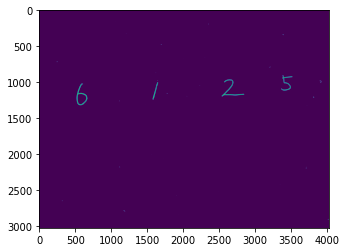

In [79]:
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
hue, saturation , value = cv2.split(hsv)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
topHat = cv2.morphologyEx(value,cv2.MORPH_TOPHAT,kernel)
blackHat = cv2.morphologyEx(value,cv2.MORPH_BLACKHAT,kernel)
add = cv2.add(value,topHat)
subtract = cv2.subtract(add,blackHat)
blur = cv2.GaussianBlur(subtract,(5,5),0)
thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,19,9)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(thresh)

533 661 1161 1311
525 670 1022 1319
1582 1656 1003 1242
2542 2852 966 1197
3370 3521 905 1115


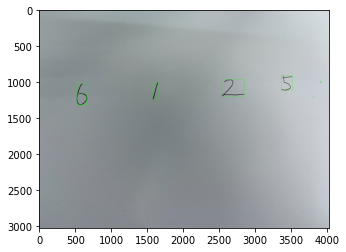

In [85]:
img_digits = []
margin= 10

for contour in contours :
  x,y,w,h = cv2.boundingRect(contour)

  if w*h < 1000: continue 
  img_digits.append(thresh[y-margin:y+h+margin, x-margin:x+w+margin])

  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
  print(x,x+w,y,y+h)
  
plt.imshow(img)

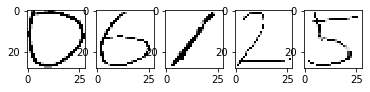

In [86]:
size = 28 
for i in range(len(img_digits)) : 
  plt.subplot(1,len(img_digits),i+1)
  plt.imshow(cv2.resize(img_digits[i],(size,size)) , cmap='Greys',interpolation='nearest')
plt.show()

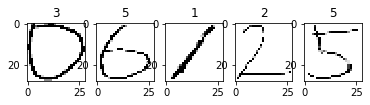

In [87]:
size = 28

for i in range(len(img_digits)) : 
  plt.subplot(1,len(img_digits),i+1)
  num = cv2.resize(img_digits[i], (size,size))
  num = num.astype('float32') / 255 
  plt.imshow(num, cmap = 'Greys', interpolation='nearest')
  result = model.predict(np.array([num]))
  result_number = np.argmax(result)
  plt.title(result_number)

plt.show()